In [1]:
import numpy as np
import pandas as pd

wafer = pd.read_csv(r'D:\Jupyter_Notebook\Datasets\thk.csv')
wafer.head(3)

prmt = wafer['prmt'].value_counts().index
print(prmt)

slot = int(input("slot을 입력하세요. (ex.05) : "))
Parameter = input("Parameter를 입력하세요. (ex.T3) : ")

Index(['T3', 'X_1000', 'Y_1000'], dtype='object')
slot을 입력하세요. (ex.05) : 19
Parameter를 입력하세요. (ex.T3) : T3


In [2]:
cond_x = (wafer['prmt'] == 'X_1000')
cond_y = (wafer['prmt'] == 'Y_1000')
cond_z = (wafer['prmt'] == Parameter)
cond_slot = (wafer['wf'] == slot)

len_xy = (cond_slot&cond_z).sum()

x = wafer.loc[cond_slot&cond_x]['value'].reset_index(drop=True)
y = wafer.loc[cond_slot&cond_y]['value'].reset_index(drop=True)
thk = wafer.loc[cond_slot&cond_z]['value'].reset_index(drop=True)

x_train = []
for i in range(len_xy) :
    x_train.append([x[i],y[i]])

d:\python\lib\site-packages\sklearn\gaussian_process\kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


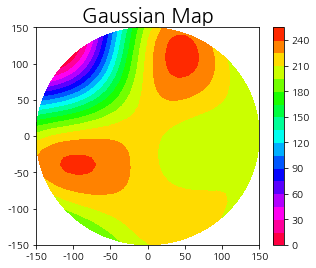

In [3]:
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

x_train = np.array(x_train)
y_train = np.array(thk)

# test set
XY = []       
for r in np.arange(0,151,10) :
    for rr in np.arange(0,r+1,10) :
        XY.append([-rr,np.sqrt(r**2-rr**2)])
        XY.append([rr,np.sqrt(r**2-rr**2)])
        XY.append([-rr,-np.sqrt(r**2-rr**2)])
        XY.append([rr,-np.sqrt(r**2-rr**2)])
        XY.append([np.sqrt(r**2-rr**2),-rr])
        XY.append([np.sqrt(r**2-rr**2),rr])
        XY.append([-np.sqrt(r**2-rr**2),-rr])
        XY.append([-np.sqrt(r**2-rr**2),rr])
x_test = np.array(XY)

# Gaussian Process
kernel = C(1.0, (1e-3, 1e3)) * RBF(10)
gp = GaussianProcessRegressor(kernel=kernel)

gp.fit(x_train, y_train)
y_test = gp.predict(x_test)

x_merge = np.concatenate((x_train, x_test),axis=0)
thk_merge = np.concatenate((y_train, y_test),axis=0)

x1 = []
y1 = []
z1 = []
for i in range(len(x_merge)) :
    x1.append(x_merge[i,0])
    y1.append(x_merge[i,1])
    z1.append(thk_merge[i])
    
plt.figure(figsize=(5,4))
plt.tricontourf(x1,y1,z1, 20, cmap='hsv_r')
plt.title('Gaussian Map', fontsize=20)
plt.colorbar()

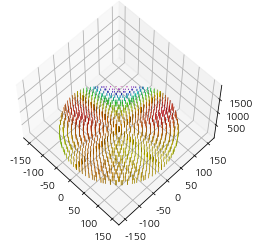

In [7]:
import matplotlib as mpl
import matplotlib.cm as cm

x1 = np.array(x1)
y1 = np.array(y1)
z1 = np.array(z1)
z2 = np.array(z1 - np.min(z1)+5)

fig = plt.figure()
ax = fig.gca(projection='3d')
dx = np.ones(x1.size)
dy = np.ones(x1.size)
dz = z2.flatten()

cmap = cm.get_cmap('gist_rainbow_r')
max_height = np.max(dz)  
min_height = np.min(dz)
rgba = [cmap((k-min_height)/max_height) for k in dz]

ax.bar3d(x1, y1,z2, dx, dy, dz, color=rgba)
ax.set_zlim3d(np.min(dz), np.max(dz)*8 )

ax.view_init(elev=60, azim=-45)

plt.show()